# Did Someone Get Robbed at IIT Today: A Brief Data Analysis 
## Nathan Cooper Jones 
### <i> Last Updated: 04/15/2018 </i> 

## Importing the Good Stuff 

In [16]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 

import plotly.plotly as py

import datetime as datetime 

from sodapy import Socrata 

## Getting the Data (via the SODA API) 

In [17]:
# data = pd.read_csv("Crimes_-_2018.csv") # already in my root directory :) 

# let's try using the API instead... ;) 
client = Socrata("data.cityofchicago.org", "fjGOsCOhLa4EqoVFnLtjgT3mR") 
results = client.get("3i3m-jwuy", limit=50000) # 2018 dataset 
crimes = pd.DataFrame.from_records(results) 

crimes.shape # (number of crimes, number of attributes) 

(50000, 22)

In [18]:
crimes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
arrest                  50000 non-null bool
beat                    50000 non-null object
block                   50000 non-null object
case_number             50000 non-null object
community_area          50000 non-null object
date                    50000 non-null object
description             50000 non-null object
district                49998 non-null object
domestic                50000 non-null bool
fbi_code                50000 non-null object
id                      50000 non-null object
iucr                    50000 non-null object
latitude                48720 non-null object
location                48720 non-null object
location_description    49901 non-null object
longitude               48720 non-null object
primary_type            50000 non-null object
updated_on              50000 non-null object
ward                    49999 non-null object
x_coordinate         

In [19]:
crimes.head() 

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,False,1214,008XX W LAKE ST,JB218729,28,2018-04-07T23:59:00,SIMPLE,012,False,08B,...,41.885635134,"{'latitude': '41.885635134', 'human_address': ...",BAR OR TAVERN,-87.649182539,BATTERY,2018-04-14T15:51:10,27,1170544,1901658,2018
1,False,0621,076XX S PARNELL AVE,JB215532,69,2018-04-07T23:58:00,UNLAWFUL USE HANDGUN,006,False,15,...,41.755168367,"{'latitude': '41.755168367', 'human_address': ...",RESIDENTIAL YARD (FRONT/BACK),-87.638446209,WEAPONS VIOLATION,2018-04-14T15:51:10,17,1173852,1854140,2018
2,False,0835,030XX W 77TH ST,JB215510,70,2018-04-07T23:58:00,DOMESTIC BATTERY SIMPLE,008,True,08B,...,41.753500514,"{'latitude': '41.753500514', 'human_address': ...",RESIDENCE,-87.699304621,BATTERY,2018-04-14T15:51:10,18,1157251,1853404,2018
3,True,1925,035XX N PINE GROVE AVE,JB215598,6,2018-04-07T23:54:00,OVER $500,019,False,06,...,41.946375927,"{'latitude': '41.946375927', 'human_address': ...",STREET,-87.644603967,THEFT,2018-04-14T15:51:10,46,1171613,1923802,2018
4,False,0132,018XX S INDIANA AVE,JB216607,33,2018-04-07T23:50:00,TO VEHICLE,001,False,14,...,NaN,NaN,STREET,NaN,CRIMINAL DAMAGE,2018-04-14T15:51:10,2,NaN,NaN,2018


## Preprocessing the Data 

In [20]:
# only Illinois Tech crimes 
crimes = crimes.loc[crimes['y_coordinate'] >= "1881529"] 
crimes = crimes.loc[crimes['x_coordinate'] <= "1177934"] 
crimes = crimes.loc[crimes['x_coordinate'] >= "1175649"] 
crimes = crimes.loc[crimes['y_coordinate'] <= "1885312"] 

# delete some rows 
crimes.drop(['updated_on', 'location', 'community_area', 'ward', 'x_coordinate', 'y_coordinate'],  
                       inplace = True, axis=1) 
crimes.drop_duplicates(subset=['id', 'case_number'], inplace=True) 

# 2018-03-24T10:09:00 
crimes.date = pd.to_datetime(crimes.date, format='%Y-%m-%dT%H:%M:%S') 
crimes.index = pd.DatetimeIndex(crimes.date) 

crimes.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2018-04-06 21:50:00 to 2018-01-19 22:30:00
Data columns (total 16 columns):
arrest                  81 non-null bool
beat                    81 non-null object
block                   81 non-null object
case_number             81 non-null object
date                    81 non-null datetime64[ns]
description             81 non-null object
district                81 non-null object
domestic                81 non-null bool
fbi_code                81 non-null object
id                      81 non-null object
iucr                    81 non-null object
latitude                81 non-null object
location_description    81 non-null object
longitude               81 non-null object
primary_type            81 non-null object
year                    81 non-null object
dtypes: bool(2), datetime64[ns](1), object(13)
memory usage: 9.7+ KB


In [64]:
crimes.head() 

,arrest,beat,block,case_number,date,description,district,domestic,fbi_code,id,iucr,latitude,location_description,longitude,primary_type,year
date,,,,,,,,,,,,,,,,
2018-04-06 21:50:00,False,0211,031XX S MICHIGAN AVE,JB214345,2018-04-06 21:50:00,SIMPLE,002,False,08B,11278029,0460,41.837871585,SMALL RETAIL STORE,-87.623435005,BATTERY,2018
2018-04-06 17:45:00,False,0213,035XX S MICHIGAN AVE,JB214112,2018-04-06 17:45:00,DOMESTIC BATTERY SIMPLE,002,True,08B,11277884,0486,41.830611847,VEHICLE NON-COMMERCIAL,-87.623247369,BATTERY,2018
2018-04-06 05:00:00,False,0211,033XX S MICHIGAN AVE,JB213781,2018-04-06 05:00:00,PRO EMP HANDS NO/MIN INJURY,002,False,08B,11278009,0484,41.834155131,NURSING HOME/RETIREMENT HOME,-87.623318288,BATTERY,2018
2018-04-05 11:00:00,False,0211,034XX S STATE ST,JB212464,2018-04-05 11:00:00,FROM BUILDING,002,False,06,11276611,0890,41.832156013,"SCHOOL, PRIVATE, BUILDING",-87.626668478,THEFT,2018
2018-04-04 14:02:00,False,0213,035XX S MICHIGAN AVE,JB211223,2018-04-04 14:02:00,AGG PO HANDS NO/MIN INJURY,002,False,08B,11275809,0454,41.830611847,POLICE FACILITY/VEH PARKING LOT,-87.623247369,BATTERY,2018


In [22]:
crimes.shape # (number of crimes, number of attributes) 

(81, 16)

## Visualizing and Exploring the Data 

### Types of Crimes 

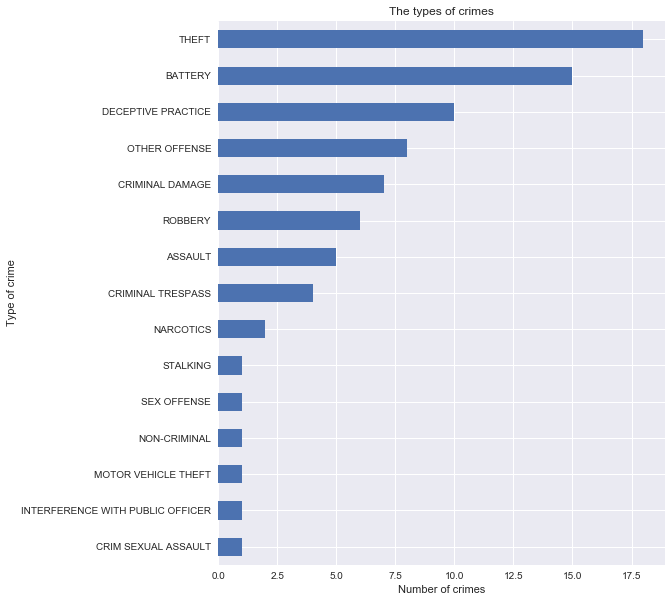

In [23]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['primary_type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('The types of crimes')
plt.ylabel('Type of crime')
plt.xlabel('Number of crimes') 
plt.show() 

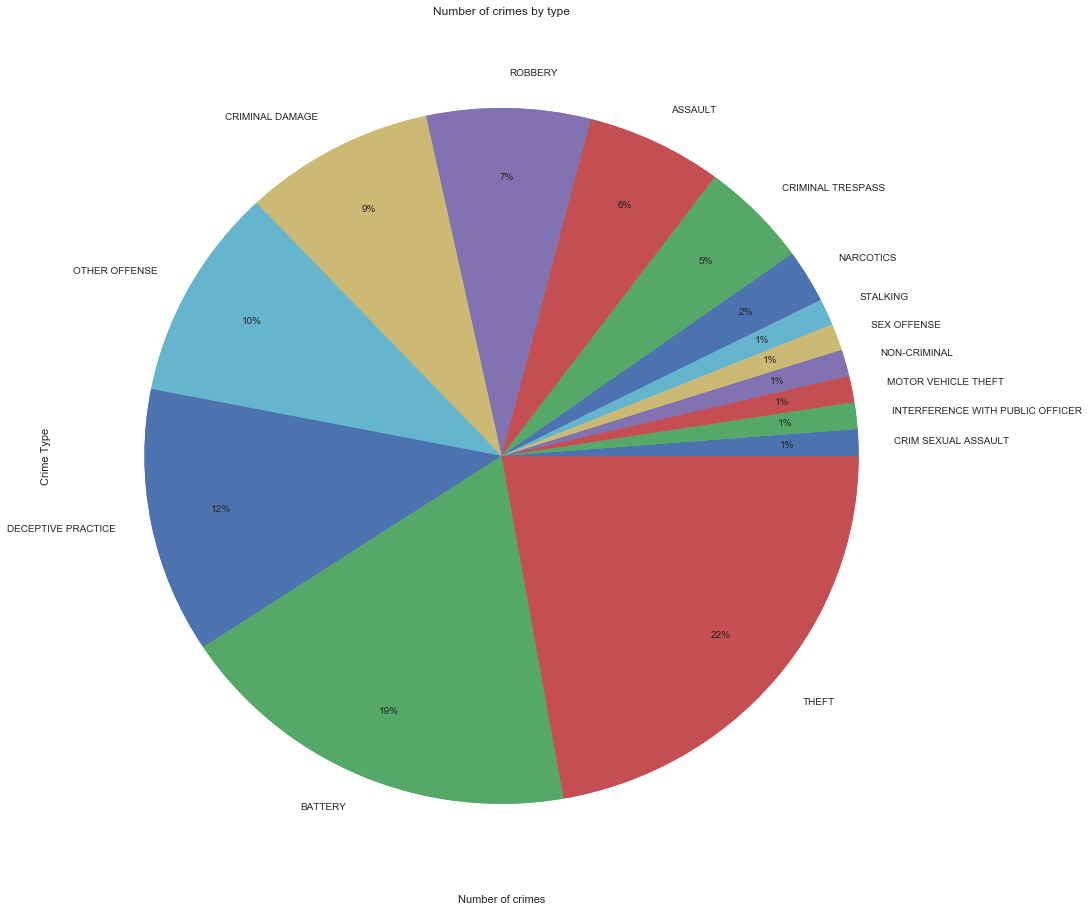

In [24]:
plt.figure(figsize=(16, 16))
crimes.groupby([crimes['primary_type']]).size().sort_values(ascending=True).plot(kind='pie')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.pie(crimes.groupby([crimes['primary_type']]).size().sort_values(ascending=True), autopct='%1.0f%%', pctdistance=.8, labeldistance=20) 
plt.show()

### Number of Crimes in Time 

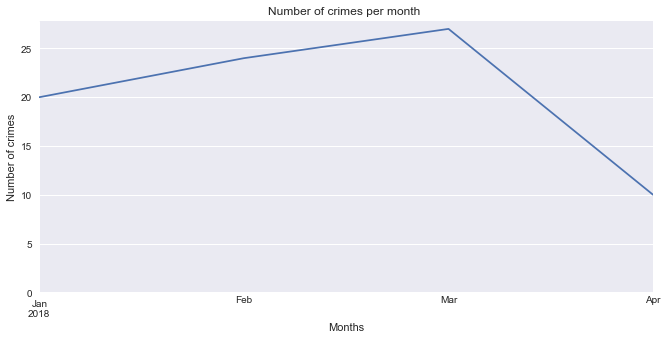

In [25]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month ') 
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.ylim(ymin=0) 
plt.show()

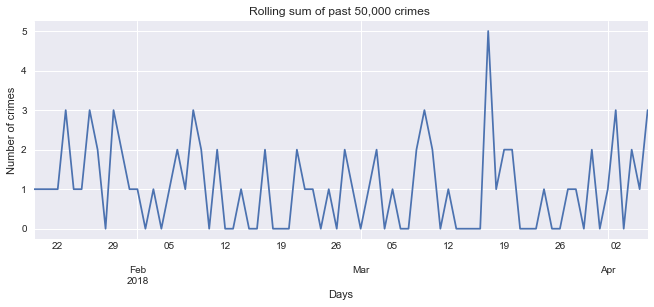

In [26]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(1).sum().plot()
plt.title('Rolling sum of past 50,000 crimes ') 
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

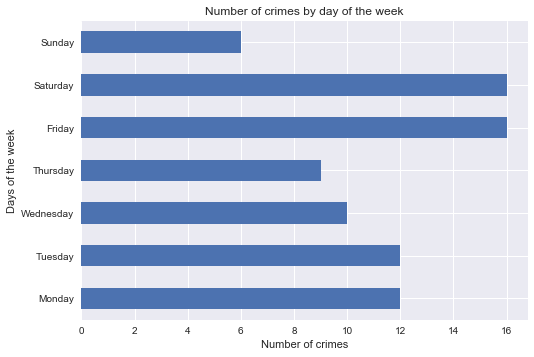

In [27]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

### Time Frame of Crimes by Type 

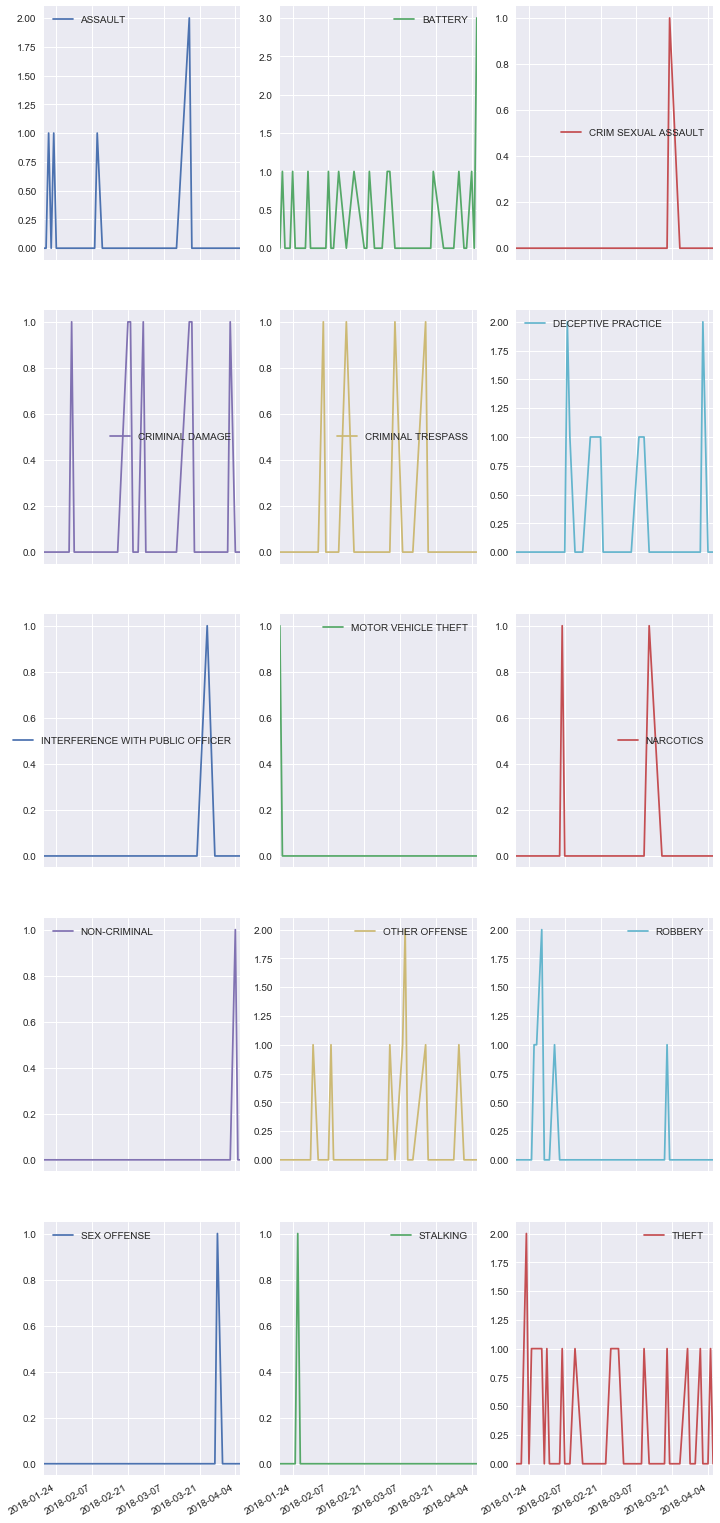

In [28]:
crimes_count_date = crimes.pivot_table('id', aggfunc=np.size, columns='primary_type', index=crimes.index.date, fill_value=0) 
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(1).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=True, sharey=False, legend=True) 

### By Location 

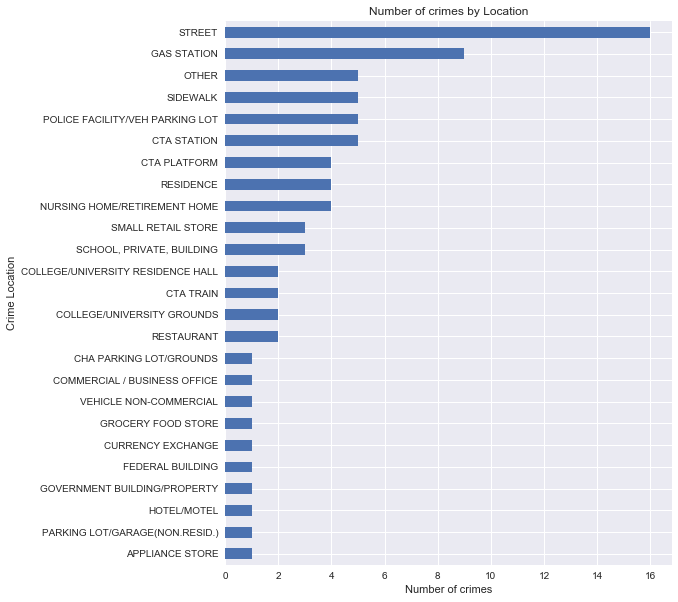

In [29]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['location_description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

### Let's Make Some Heatmaps 

In [37]:
crimes.index.hour 

Int64Index([21, 17,  5, 11, 14,  8, 20, 17, 12, 16, 12, 11, 15, 14, 10, 20, 16,
            18, 17, 18, 15, 15, 11,  9,  7, 15, 14,  8, 15, 12, 11, 19, 10, 15,
             9,  2, 13, 21, 20, 18,  3, 22, 12, 18, 17, 18, 13,  8, 17, 15, 18,
             9, 17, 17, 12, 22, 22, 12,  9,  9, 10, 13, 23, 19, 22, 18, 10, 16,
             9, 18,  7,  7, 18, 13, 22, 14, 12, 22, 16,  0, 22],
           dtype='int64', name='date')

In [38]:
np.size 

<function numpy.core.fromnumeric.size>

In [61]:
# Note that the code below is taken almost entirely from 
# https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016. 
# Maybe one day I will be this smart, but today is not that day. 

hour_by_location = crimes.pivot_table(values='id', index='location_description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
hour_by_type = crimes.pivot_table(values='id', index='primary_type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

# had to fix hour_by_week since default was very bugged 
hour_by_week = crimes.pivot_table(values='id', index=crimes.index.hour, columns=crimes.index.strftime("%A"), aggfunc=np.size).fillna(0)
hour_by_week = hour_by_week[days].T # reorder columns according to the the order of days 

dayofweek_by_location = crimes.pivot_table(values='id', index='location_description', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='id', index='primary_type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type = crimes.pivot_table(values='id', index='location_description', columns='primary_type', aggfunc=np.size).fillna(0)

In [62]:
from sklearn.cluster import AgglomerativeClustering as AC 

def scale_df(df,axis=0): 
    ''' 
    A utility function to scale numerical values (z-scale) to have a mean of zero 
    and a unit variance. 
    ''' 
    return (df - df.mean(axis=axis)) / df.std(axis=axis) 

def plot_hmap(df, ix=None, cmap='bwr'): 
    ''' 
    A function to plot heatmaps that show temporal patterns 
    ''' 
    if ix is None: 
        ix = np.arange(df.shape[0]) 
    cmap = plt.cm.YlOrRd 
    plt.imshow(df.iloc[ix,:], cmap=cmap) 
    plt.colorbar(fraction=0.03) 
    plt.yticks(np.arange(df.shape[0]), df.index[ix]) 
    plt.xticks(np.arange(len(set(df.columns))), df.columns) # now we can support smaller datasets with hours no fully filled 
    plt.grid(False) 
    plt.show() 
    
def scale_and_plot(df, ix = None): 
    ''' 
    A wrapper function to calculate the scaled values within each row of df and plot_hmap 
    ''' 
    df_marginal_scaled = scale_df(df.T).T 
    if ix is None: 
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps 
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))]) 
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap) 
    plot_hmap(df_marginal_scaled, ix=ix) 

### Type of Crime vs Hour (00 - 23) 

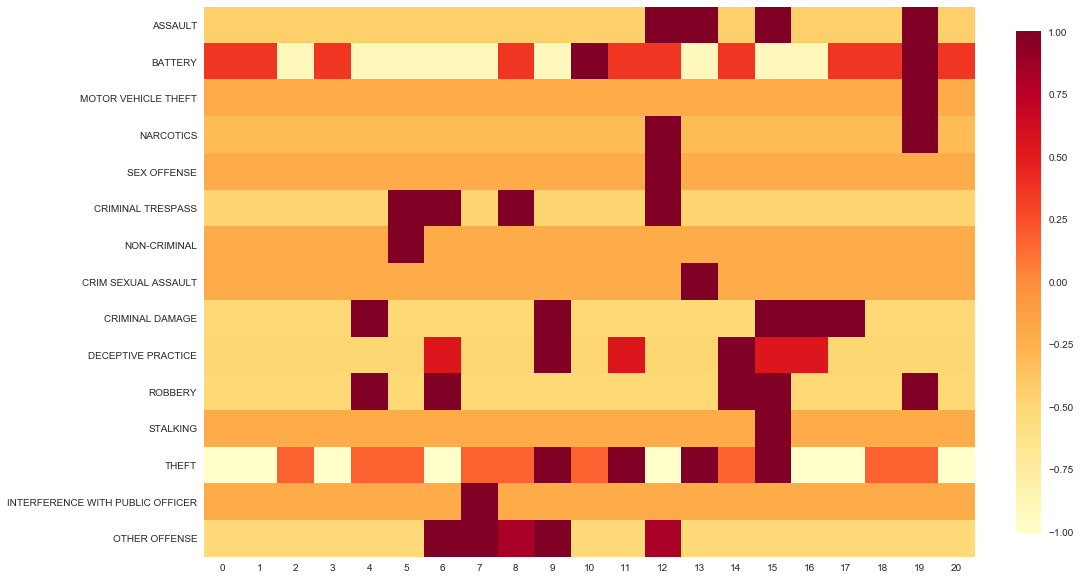

In [63]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

### Location of Crime vs Hour (00 - 23) 

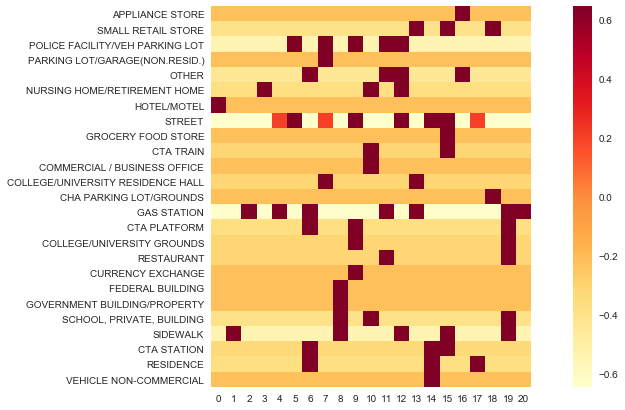

In [19]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

### Type of Crime vs Day of Week (0 [Monday] - 6 [Sunday]) 

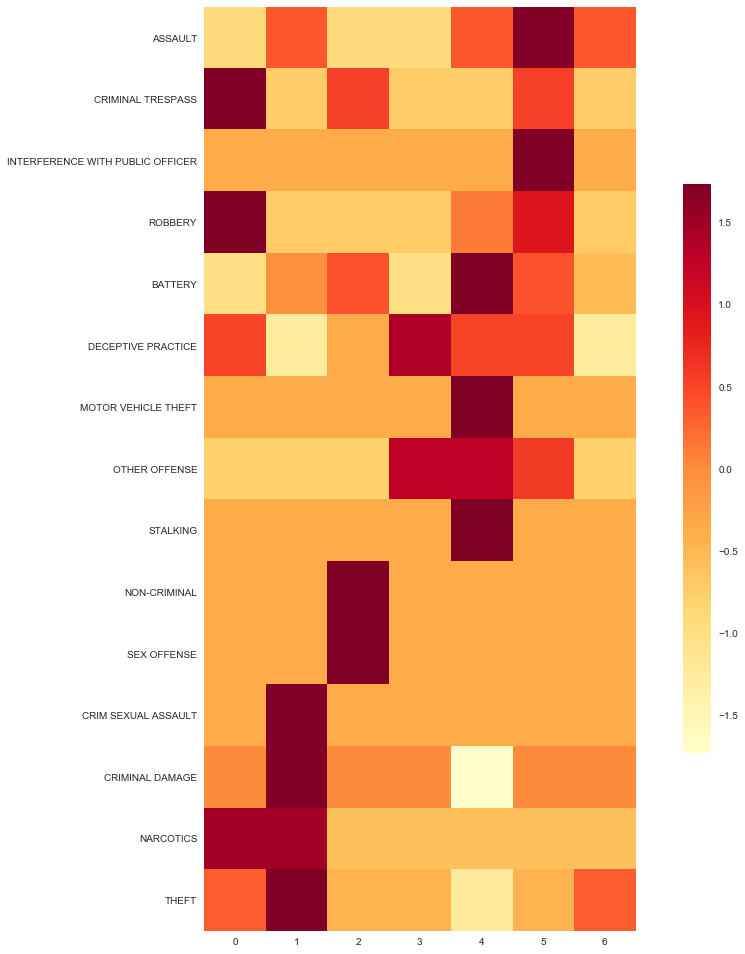

In [20]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

### Day of Week of Crime vs Hour (00 - 23) 

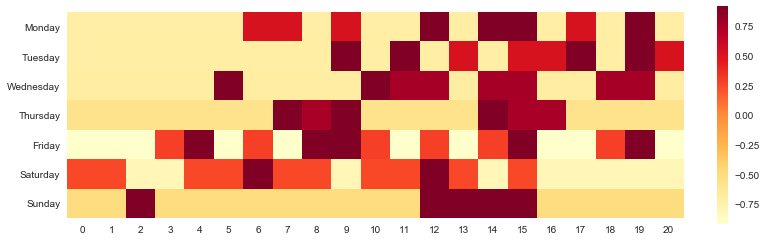

In [21]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7)) 

In [22]:
print("Here are the most recent \033[1m{}\033[0m crimes that took place in the Illinois Institute of Technology area. " 
    .format(crimes.shape[0])) 
with pd.option_context('display.max_rows', None, 'display.max_columns', 6): 
    display(crimes[['primary_type', 'description', 'block', 'location_description', 'arrest', 'case_number']]
            .rename(columns={'primary_type': 'Primary Type', 'description': 'Description', 'block': 'Block', 
                             'location_description': 'Location Description', 'arrest': 'Arrest?', 
                             'case_number': 'Case Number'})) 

Here are the most recent 81 crimes that took place in the Illinois Institute of Technology area. 


,Primary Type,Description,Block,Location Description,Arrest?,Case Number
date,,,,,,
2018-04-06 21:50:00,BATTERY,SIMPLE,031XX S MICHIGAN AVE,SMALL RETAIL STORE,False,JB214345
2018-04-06 17:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,035XX S MICHIGAN AVE,VEHICLE NON-COMMERCIAL,False,JB214112
2018-04-06 05:00:00,BATTERY,PRO EMP HANDS NO/MIN INJURY,033XX S MICHIGAN AVE,NURSING HOME/RETIREMENT HOME,False,JB213781
2018-04-05 11:00:00,THEFT,FROM BUILDING,034XX S STATE ST,"SCHOOL, PRIVATE, BUILDING",False,JB212464
2018-04-04 14:02:00,BATTERY,AGG PO HANDS NO/MIN INJURY,035XX S MICHIGAN AVE,POLICE FACILITY/VEH PARKING LOT,False,JB211223
2018-04-04 08:52:00,NON-CRIMINAL,FOID - REVOCATION,035XX S MICHIGAN AVE,POLICE FACILITY/VEH PARKING LOT,False,JB210752
2018-04-02 20:15:00,CRIMINAL DAMAGE,TO VEHICLE,034XX S STATE ST,STREET,False,JB209154
2018-04-02 17:00:00,DECEPTIVE PRACTICE,INSURANCE FRAUD,030XX S MICHIGAN AVE,RESIDENCE,False,JB211405
2018-04-02 12:21:00,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,001XX E 35TH ST,CURRENCY EXCHANGE,False,JB212627
